# ***ÁRVORE DE DECISÃO NO RAMO DA FÍSICA***

Alunos:
- Bruno Arthur Basso Silva | 22.123.067-5
- Gabriela Molina Ciocci   | 22.222.032-9

Orientadora:
- Prof. Eliane de Fátima Chinaglia


## Banco de dados e bibliotecas

### Importando bibliotecas

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import openpyxl
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression


### Fonte de dados dos nossos dados

In [27]:
url='https://docs.google.com/spreadsheets/d/1bnHjgGTCPciHcbG2ZQMSpzZFdEVCTC9c/edit?usp=sharing&ouid=113070282599178275299&rtpof=true&sd=true'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

Simulated_DF = pd.read_excel(url)

Simulated_DF

,theta (graus),M (kg),m (kg),aceleracao (m/s^2)
0,0,0.2,0.009,0.413654
1,0,0.2,0.009,0.406930
2,0,0.2,0.009,0.421632
3,0,0.2,0.009,0.418014
4,0,0.2,0.009,0.419424
...,...,...,...,...
175,0,0.4,0.031,0.692224
176,0,0.4,0.031,0.690962
177,0,0.4,0.031,0.687701
178,0,0.4,0.031,0.685830


In [28]:
url2='https://docs.google.com/spreadsheets/d/1yANFYw1If1ejQAZtvhrJ0ZKphX7vMCwL/edit?usp=sharing&ouid=113070282599178275299&rtpof=true&sd=true'
url2='https://drive.google.com/uc?id=' + url2.split('/')[-2]

Experimental_DF = pd.read_excel(url2)

Experimental_DF

,M (kg),m (kg),aceleracao exp (cm/s^2),aceleracao (m/s^2),aceleracao calc (m/s^2),pctg,Unnamed: 6,Unnamed: 7
0,0.2,0.009,37.591101,0.375911,0.421148,0.107414,NaN,NaN
1,0.2,0.009,37.692308,0.376923,0.421148,0.105011,NaN,NaN
2,0.2,0.009,37.657547,0.376575,0.421148,0.105836,NaN,NaN
3,0.2,0.009,38.200015,0.382000,0.421148,0.092956,NaN,NaN
4,0.2,0.009,38.534245,0.385342,0.421148,0.085020,NaN,NaN
...,...,...,...,...,...,...,...,...
80,0.4,0.031,70.262451,0.702625,0.703434,0.001151,NaN,NaN
81,0.4,0.031,70.369167,0.703692,0.703434,0.000366,NaN,NaN
82,0.4,0.031,70.437342,0.704373,0.703434,0.001336,NaN,NaN
83,0.4,0.031,70.508890,0.705089,0.703434,0.002353,NaN,NaN


In [29]:
Experimental_DF.drop(columns=['aceleracao exp (cm/s^2)','aceleracao calc (m/s^2)', 'pctg', 'Unnamed: 6', 'Unnamed: 7'], inplace=True)
#Experimental_DF.rename(columns={'aceleracao exp (m/s^2)': 'aceleracao (m/s^2)'}, inplace=True)

Experimental_DF

,M (kg),m (kg),aceleracao (m/s^2)
0,0.2,0.009,0.375911
1,0.2,0.009,0.376923
2,0.2,0.009,0.376575
3,0.2,0.009,0.382000
4,0.2,0.009,0.385342
...,...,...,...
80,0.4,0.031,0.702625
81,0.4,0.031,0.703692
82,0.4,0.031,0.704373
83,0.4,0.031,0.705089


### Box Plot dos valores dos dados experimentais

In [30]:
fig = px.box(Experimental_DF, x='m (kg)', y='aceleracao (m/s^2)')
#fig.update_layout(xaxis_title='m', yaxis_title='Aceleração',  plot_bgcolor="white", width=800, height=600)

fig.update_layout(
    xaxis=dict(
        title="massa m (kg)",
        color="black",
        zeroline=True,
        zerolinecolor="black",
        zerolinewidth=1,
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        showline=True,
        linecolor='black',
        linewidth=2,
        tickformat=".3f",     # AJUSTAR P NÚMERO DE CASAS DECIMAIS DO EIXO X
        dtick=0.005             # AJUSTAR A ESCALA PARA MELHOR VISUALIZAÇÃO
    ),
    yaxis=dict(
        title="Aceleração (m/s^2)",
        color="black",
        zeroline=True,
        zerolinecolor="black",
        zerolinewidth=1,
        showgrid=True,
        gridwidth=1,
        gridcolor="lightgray",
        showline=True,
        linecolor='black',
        linewidth=2,
        tickformat=".1f",   # AJUSTAR P NÚMERO DE CASAS DECIMAIS DO EIXO Y
        dtick=10           # AJUSTAR A ESCALA PARA MELHOR VISUALIZAÇÃO
    ),
    title="Boxplot da Aceleração por m",
    showlegend=True,
    legend=dict(
        x=0.3,
        y=1.2,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    ),
    plot_bgcolor="white",
    width=800,  # Definindo a largura da figura
    height=600 # Definindo a altura da figura
)


fig.show()

In [31]:
print(f"Quantidade de valores diferentes de m: {Experimental_DF['m (kg)'].nunique()}")
print(f"Quantidade de valores diferentes de m: {Simulated_DF['m (kg)'].nunique()}")

m_unico_Sim=(Simulated_DF['m (kg)'].unique())
m_unico_Exp=(Experimental_DF['m (kg)'].unique())

classificacoes = ['A', 'B', 'C', 'D', 'E', "F", "G"]

mapeamento_Sim = dict(zip(m_unico_Sim, classificacoes))
mapeamento_Exp = dict(zip(m_unico_Exp, classificacoes))

Simulated_DF['classificacao'] = Simulated_DF['m (kg)'].map(mapeamento_Sim)
Experimental_DF['classificacao'] = Experimental_DF['m (kg)'].map(mapeamento_Exp)



Quantidade de valores diferentes de m: 6
Quantidade de valores diferentes de m: 6


### Separando os dados de teste (Experimentais) e os dados de treino (Simulados)

In [32]:
x_train = Simulated_DF[['M (kg)', 'aceleracao (m/s^2)']]
y_train = Simulated_DF['classificacao']

x_test = Experimental_DF[['M (kg)', 'aceleracao (m/s^2)']]
y_test = Experimental_DF['classificacao']

In [33]:
print(x_train.isnull().sum())  # Verifica NaNs por coluna
print(y_train.isnull().sum())  # Verifica NaNs no vetor de saída

M (kg)                0
aceleracao (m/s^2)    0
dtype: int64
0


In [34]:
Simulated_DF.head(100)

,theta (graus),M (kg),m (kg),aceleracao (m/s^2),classificacao
0,0,0.2,0.009,0.413654,A
1,0,0.2,0.009,0.406930,A
2,0,0.2,0.009,0.421632,A
3,0,0.2,0.009,0.418014,A
4,0,0.2,0.009,0.419424,A
...,...,...,...,...,...
95,0,0.2,0.022,0.940053,D
96,0,0.2,0.022,0.950508,D
97,0,0.2,0.022,0.935274,D
98,0,0.2,0.022,0.938855,D


In [35]:
Experimental_DF.head(100)

,M (kg),m (kg),aceleracao (m/s^2),classificacao
0,0.2,0.009,0.375911,A
1,0.2,0.009,0.376923,A
2,0.2,0.009,0.376575,A
3,0.2,0.009,0.382000,A
4,0.2,0.009,0.385342,A
...,...,...,...,...
80,0.4,0.031,0.702625,F
81,0.4,0.031,0.703692,F
82,0.4,0.031,0.704373,F
83,0.4,0.031,0.705089,F


## - Árvore de Decisão!

In [36]:
# Escolhendo os melhores parâmetros para utilizar na arvore
funcao_criterion = ['gini', 'log_loss', 'entropy']
funcao_split = ['best', 'random']

resultados = []

for max in range(1, 16):
  for crit in funcao_criterion:
    for split in funcao_split:
      for min in range(2, 11):
        # Criando o classificador
        clf = DecisionTreeClassifier(max_depth=max, criterion=crit, splitter=split, min_samples_split=min)

        # Treinando o classificador com os dados de treinamento
        clf.fit(x_train, y_train)

        # Avaliar a acurácia nos dados de teste utilizando os dados experimentais
        acuracia = clf.score(x_test, y_test)

        resultados.append([crit, split, max, min, acuracia * 100])

In [61]:
print("Os melhores resultados foram obtidos através das seguintes combinações:")
print()

for length in range(0, len(resultados)):
  if resultados[length][4] >= 97 and resultados[length][4] < 100:
    print(f"|  {resultados[length][0]} criterion, {resultados[length][1]} splitter, {resultados[length][2]} como profundidade, {resultados[length][3]} como min: {resultados[length][4]:.2f}%")

print()
print("Overfitting nos possíveis resultados com 100% de acurácia:")
for length in range(0, len(resultados)):
  if resultados[length][4] == 100:
    print(f"|  {resultados[length][0]} criterion, {resultados[length][1]} splitter, {resultados[length][2]} como profundidade: {resultados[length][3]} como min: {resultados[length][4]:.2f}%")

Os melhores resultados foram obtidos através das seguintes combinações:

|  entropy criterion, random splitter, 7 como profundidade, 3 como min: 97.65%
|  gini criterion, random splitter, 8 como profundidade, 8 como min: 98.82%
|  entropy criterion, random splitter, 9 como profundidade, 6 como min: 98.82%
|  gini criterion, random splitter, 11 como profundidade, 5 como min: 98.82%
|  gini criterion, random splitter, 11 como profundidade, 7 como min: 97.65%
|  gini criterion, random splitter, 12 como profundidade, 3 como min: 97.65%
|  gini criterion, random splitter, 12 como profundidade, 5 como min: 98.82%
|  gini criterion, random splitter, 12 como profundidade, 10 como min: 97.65%
|  entropy criterion, random splitter, 13 como profundidade, 2 como min: 97.65%
|  gini criterion, random splitter, 14 como profundidade, 5 como min: 98.82%
|  gini criterion, random splitter, 14 como profundidade, 8 como min: 98.82%
|  log_loss criterion, random splitter, 14 como profundidade, 2 como min:

Parte oficial de treino da IA

In [53]:
# Criando o classificador
clf = DecisionTreeClassifier(max_depth=8, criterion='gini', splitter='random', min_samples_split=3)

# Treinando o classificador com os dados de treinamento
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=3, splitter='random')

## -  Avaliação dos parâmetros!

In [39]:
# Obtendo as importâncias das características
importancias = clf.feature_importances_

# Vinculando as importâncias às respectivas características
for feature, importance in zip(x_train.columns, importancias):
    print(f"A importância da variável {feature} é {importance * 100:.2f}%")

A importância da variável M (kg) é 24.56%
A importância da variável aceleracao (m/s^2) é 75.44%


## -  Avaliando todas as métricas#

### Acurácia

In [56]:
# Predição nos dados de teste
acuracia = clf.score(x_test, y_test)
print(f"A acurácia da AD nos dados de teste é {acuracia * 100:.2f}%")

A acurácia da AD nos dados de teste é 94.12%


### Recall

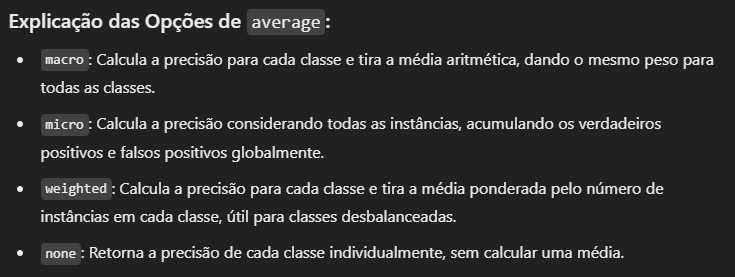

In [41]:
# Predição nos dados de teste
y_pred = clf.predict(x_test)

# Cálculo do recall para cada tipo de average
r_macro = recall_score(y_test, y_pred, average='macro')
r_micro = recall_score(y_test, y_pred, average='micro')
r_weighted = recall_score(y_test, y_pred, average='weighted')
r_none = recall_score(y_test, y_pred, average=None)  # Retorna o recall para cada classe

# Exibindo os valores de recall
print(f"Macro: {r_macro * 100:.2f}%")
print(f"Micro: {r_micro * 100:.2f}%")
print(f"Weighted:{r_weighted * 100:.2f}%")
print("None:", r_none * 100)

Macro: 86.11%
Micro: 88.24%
Weighted:88.24%
None: [ 50.         100.         100.          73.33333333 100.
  93.33333333]


### Precision

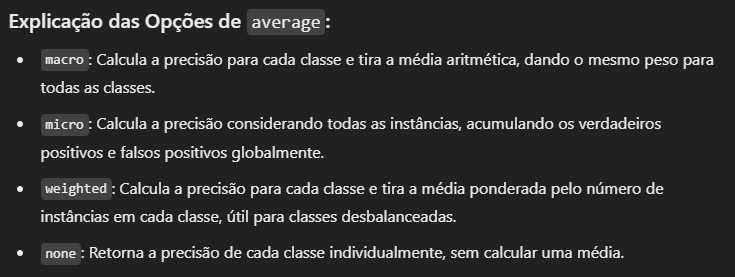

In [42]:
# Predição nos dados de teste
y_pred = clf.predict(x_test)

# Cálculo do recall para cada tipo de average
p_macro = precision_score(y_test, y_pred, average='macro')
p_micro = precision_score(y_test, y_pred, average='micro')
p_weighted = precision_score(y_test, y_pred, average='weighted')
p_none = precision_score(y_test, y_pred, average=None)  # Retorna o recall para cada classe

# Exibindo os valores de recall
print(f"Macro: {p_macro * 100:.2f}%")
print(f"Micro: {p_micro * 100:.2f}%")
print(f"Weighted:{p_weighted * 100:.2f}%")
print("None:", p_none * 100)

Macro: 91.09%
Micro: 88.24%
Weighted:90.56%
None: [100.          75.         100.         100.          93.75
  77.77777778]


### Matriz de Confusão

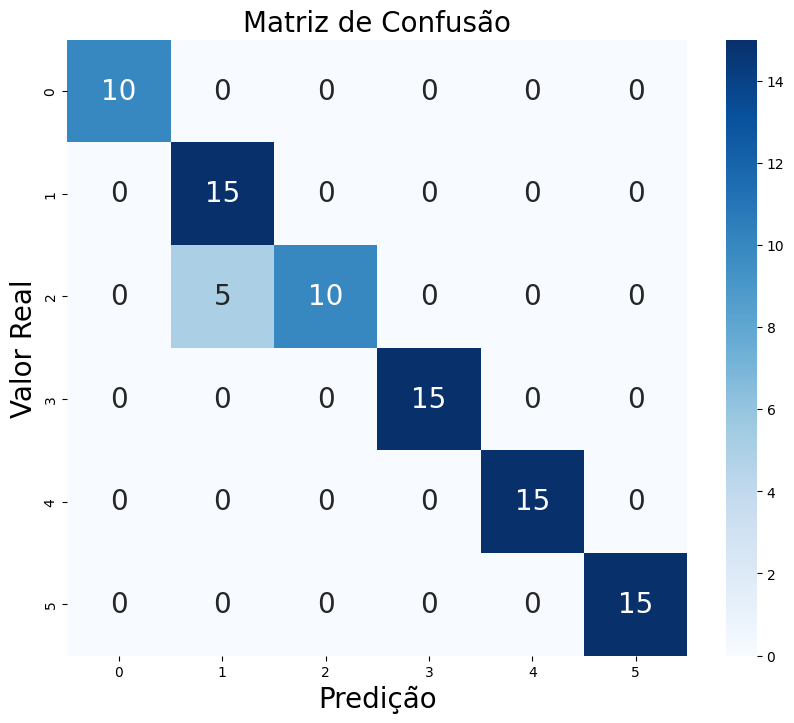

Classe 0: Falsos Positivos (FP) = 0, Falsos Negativos (FN) = 0
Classe 1: Falsos Positivos (FP) = 5, Falsos Negativos (FN) = 0
Classe 2: Falsos Positivos (FP) = 0, Falsos Negativos (FN) = 5
Classe 3: Falsos Positivos (FP) = 0, Falsos Negativos (FN) = 0
Classe 4: Falsos Positivos (FP) = 0, Falsos Negativos (FN) = 0
Classe 5: Falsos Positivos (FP) = 0, Falsos Negativos (FN) = 0

Classe A:
Falsos Positivos (FP): []
Falsos Negativos (FN): []

Classe B:
Falsos Positivos (FP): ['Índice: 25, Verdadeiro: C, Predito: B', 'Índice: 26, Verdadeiro: C, Predito: B', 'Índice: 27, Verdadeiro: C, Predito: B', 'Índice: 28, Verdadeiro: C, Predito: B', 'Índice: 29, Verdadeiro: C, Predito: B']
Falsos Negativos (FN): []

Classe C:
Falsos Positivos (FP): []
Falsos Negativos (FN): ['Índice: 25, Verdadeiro: C, Predito: B', 'Índice: 26, Verdadeiro: C, Predito: B', 'Índice: 27, Verdadeiro: C, Predito: B', 'Índice: 28, Verdadeiro: C, Predito: B', 'Índice: 29, Verdadeiro: C, Predito: B']

Classe D:
Falsos Positivos

In [59]:
# Predição nos dados de teste
y_pred = clf.predict(x_test)
matriz_confusao = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusao, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 20})  # Aumenta o tamanho da fonte das anotações
plt.xlabel('Predição', fontsize=20)
plt.ylabel('Valor Real', fontsize=20)
plt.title('Matriz de Confusão', fontsize=20)
plt.show()

# Calculando FP e FN para cada classe
falsos_positivos = np.sum(matriz_confusao, axis=0) - np.diag(matriz_confusao)
falsos_negativos = np.sum(matriz_confusao, axis=1) - np.diag(matriz_confusao)

# Exibindo FP e FN por classe
for classe, (fp, fn) in enumerate(zip(falsos_positivos, falsos_negativos)):
    print(f"Classe {classe}: Falsos Positivos (FP) = {fp}, Falsos Negativos (FN) = {fn}")

# Identificando instâncias específicas com FP e FN
detalhes_fp = {classe: [] for classe in np.unique(y_test)}
detalhes_fn = {classe: [] for classe in np.unique(y_test)}

for i, (yt, yp) in enumerate(zip(y_test, y_pred)):
    if yp != yt:  # Previsão incorreta
        detalhes_fp[yp].append((i, yt, yp))
        detalhes_fn[yt].append((i, yt, yp))

# Exibindo resultados detalhados
for classe in np.unique(y_test):
    print(f"\nClasse {classe}:")
    print(f"Falsos Positivos (FP): {[f'Índice: {x[0]}, Verdadeiro: {x[1]}, Predito: {x[2]}' for x in detalhes_fp[classe]]}")
    print(f"Falsos Negativos (FN): {[f'Índice: {x[0]}, Verdadeiro: {x[1]}, Predito: {x[2]}' for x in detalhes_fn[classe]]}")


In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Exibindo os resultados
for i in range(len(precision)):
    print(f"Classe {i}:")
    print(f"  Precisão: {precision[i]}")
    print()

# Calcular as médias
medias = ['micro', 'macro']

for media in medias:
  precision_macro = precision_score(y_test, y_pred, average=media)
  recall_macro = recall_score(y_test, y_pred, average=media)
  f1_macro = f1_score(y_test, y_pred, average=media)

  print(f"Médias {media}:")
  print(f"  Precisão: {precision_macro}")
  print()

Classe 0:
  Precisão: 1.0

Classe 1:
  Precisão: 0.75

Classe 2:
  Precisão: 1.0

Classe 3:
  Precisão: 1.0

Classe 4:
  Precisão: 0.9375

Classe 5:
  Precisão: 0.7777777777777778

Médias micro:
  Precisão: 0.8823529411764706

Médias macro:
  Precisão: 0.9108796296296297



## - Testando os resultados!

In [46]:
acertos = 0
erros = 0

for i in range(1000):
  dado = Experimental_DF.sample()

  dado_teste = pd.DataFrame({
      'M (kg)': [dado.values[0][0]],
      'aceleracao (m/s^2)': [dado.values[0][2]]
      })

  # print(f"====================[DADO {i + 1}]======================")
  # print(dado_teste)
  # print("|=================================================")

  # Usar o método predict do modelo para fazer a previsão
  previsao_material = clf.predict(dado_teste)

  # A previsão estará no primeiro elemento do array retornado
  material = previsao_material[0]

  if material == dado.values[0][3]:
    acertos += 1
  else:
    erros += 1

  # print(f"| O material previsto é {material}")
  # print(f"| O material verdadeiro é {dado.values[0][4]}")
  # print()

print(f"Quantidade de acertos: {acertos}")
print(f"Quantidade de erros: {erros}")
print("Porcentagem de acerto: ", (acertos / (acertos + erros)) * 100, "%")
print("Porcentagem de erro: ", (erros / (acertos + erros)) * 100, "%")

Quantidade de acertos: 893
Quantidade de erros: 107
Porcentagem de acerto:  89.3 %
Porcentagem de erro:  10.7 %


## - Regressão Linear!

Fizemos tambem a regressao linear para analisar se as respostas estavam realmente correta!

In [47]:
y_train_tree = Simulated_DF['m (kg)']
y_test_tree = Experimental_DF['m (kg)']

modelo = LinearRegression()

modelo.fit(x_train, y_train_tree)

acuracia2 = modelo.score(x_test, y_test_tree)

print(f"A acurácia da árvore de decisao foi {(acuracia2 * 100):.2f}%")
previsoes = modelo.predict(x_test)

A acurácia da árvore de decisao foi 92.54%


In [48]:
previsoes = modelo.predict(x_test)

print("Previsões vs Valores Reais:")
for i in y_test_tree.index:
    print(f"Valor Real: {y_test_tree[i]}, Previsão: {previsoes[y_test_tree.index.get_loc(i)]:.3f}")

Previsões vs Valores Reais:
Valor Real: 0.009, Previsão: 0.006
Valor Real: 0.009, Previsão: 0.006
Valor Real: 0.009, Previsão: 0.006
Valor Real: 0.009, Previsão: 0.006
Valor Real: 0.009, Previsão: 0.006
Valor Real: 0.009, Previsão: 0.008
Valor Real: 0.009, Previsão: 0.008
Valor Real: 0.009, Previsão: 0.008
Valor Real: 0.009, Previsão: 0.008
Valor Real: 0.009, Previsão: 0.008
Valor Real: 0.012, Previsão: 0.015
Valor Real: 0.012, Previsão: 0.015
Valor Real: 0.012, Previsão: 0.016
Valor Real: 0.012, Previsão: 0.015
Valor Real: 0.012, Previsão: 0.015
Valor Real: 0.012, Previsão: 0.012
Valor Real: 0.012, Previsão: 0.012
Valor Real: 0.012, Previsão: 0.012
Valor Real: 0.012, Previsão: 0.012
Valor Real: 0.012, Previsão: 0.012
Valor Real: 0.012, Previsão: 0.011
Valor Real: 0.012, Previsão: 0.011
Valor Real: 0.012, Previsão: 0.011
Valor Real: 0.012, Previsão: 0.011
Valor Real: 0.012, Previsão: 0.011
Valor Real: 0.016, Previsão: 0.017
Valor Real: 0.016, Previsão: 0.017
Valor Real: 0.016, Previsão

## Possivel código de liberação para os alunos

In [49]:
def menu():
  print("|===============================================|")
  print("|            ID - ÁRVORE DE DECISÃO             |")
  print("|         Por: Bruno Arthur Basso Silva         |")
  print("|                                               |")
  print("|          Pressione enter para iniciar         |")
  print("|===============================================|")

def opcoes():
  print("Qual opção você deseja realizar?")
  print("[1] - Entrar com um dado")
  print("[2] - Sobre")
  print("[3] - Sair")
  print()

def sobre():
  print()
  print("----------> DADOS DOS DESENVOLVEDORES <----------")
  print("|======================[1]======================|")
  print("| Nome: Bruno Arthur Basso Silva                |")
  print("| Ciclo: 5° semestre                            |")
  print("| Curso: Ciência da Computação - FEI            |")
  print("| Data:                                         |")
  print("|===============================================|")
  print("|======================[2]======================|")
  print("| Nome: Gabriela Molina Ciocci                  |")
  print("| Ciclo: 5° semestre                            |")
  print("| Curso: Ciência da Computação - FEI            |")
  print("| Data:                                         |")
  print("|===============================================|")
  print()


In [50]:
opcao = -1

#menu()
#input()

while opcao != 3:
  opcao = int(input("--> "))

  if opcao == 1:
    M = float(input("Digite o valor de M: "))
    aceleracao = float(input("Digite o valor de aceleração: "))

    dado = np.array([[M, aceleracao]])

    print()
    print(f"|====================[DADO]======================|")

    # Usar o método predict do modelo para fazer a previsão
    previsao_material = clf.predict(dado)

    # A previsão estará no primeiro elemento do array retornado
    material = previsao_material[0]

    print(f"| O material previsto é {material}                        |")
    print("|================================================|")
    print()

  elif opcao == 2:
    sobre()

  elif opcao == 3:
    print("Obrigada por utilizar!")
    break

KeyboardInterrupt: Interrupted by user